**Data Analysis and Machine Learning Model Development of Titanic Dataset**

    This project will explore the Titanic Dataset (included in the Seaborn Library) with deep and comprehensive analysis. Also, the development of a prediction algorithm based on other data to determine the survivability of an individual is a goal.

**Loading Initial Libraries**

In [1]:
#numpy
import numpy as np

#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")


**Loading Dataset**

In [2]:
#Loading Titanic dataset from seaborn library
df = sns.load_dataset("titanic")

**Initial Analysis**

In [3]:
#data skimming
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#info gathering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#After skimming through the dataset, it seems some variables, such as embark data, class data, and alive data, 
#have both categorical and numerical versions of the same data. Therefore, the categorical values can be removed as they serve no additional benefit.

df.drop(["embarked", "class", "alive"], axis =  1, inplace = True)

#skim
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis**

    This section is dedicated to exploratory data analysis (EDA) for the dataset under review. The goal of this section is to deal with missing values and prepare the dataset before modeling.

In [6]:
#making a presentation of all the null values that are in the dataset
sum_null = df.isnull().sum()
pd.DataFrame(data = sum_null, columns = ["Total Null Values"])

,Total Null Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


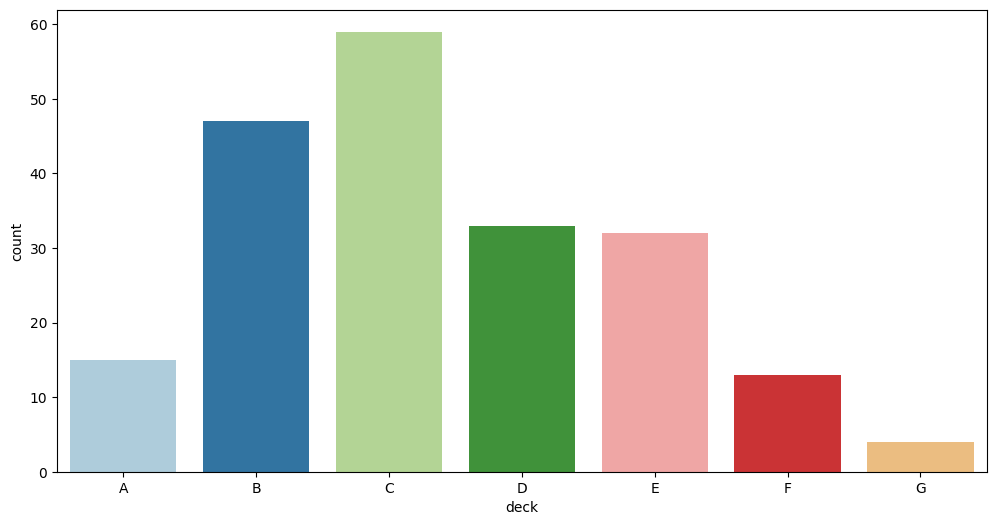

In [7]:
#From the null value chart, it seems the "deck" variable has too many null values, so it must be filled with appropriate values or be dropped.
#Before taking any actions, this variable needs to be explored a bit.
#exploring this "deck" variable --->

plt.figure(figsize=(12, 6))
deck_fig = sns.countplot(x = df["deck"], data = df, palette = "Paired")
plt.show()
deck_fig.figure.savefig("deck.png")

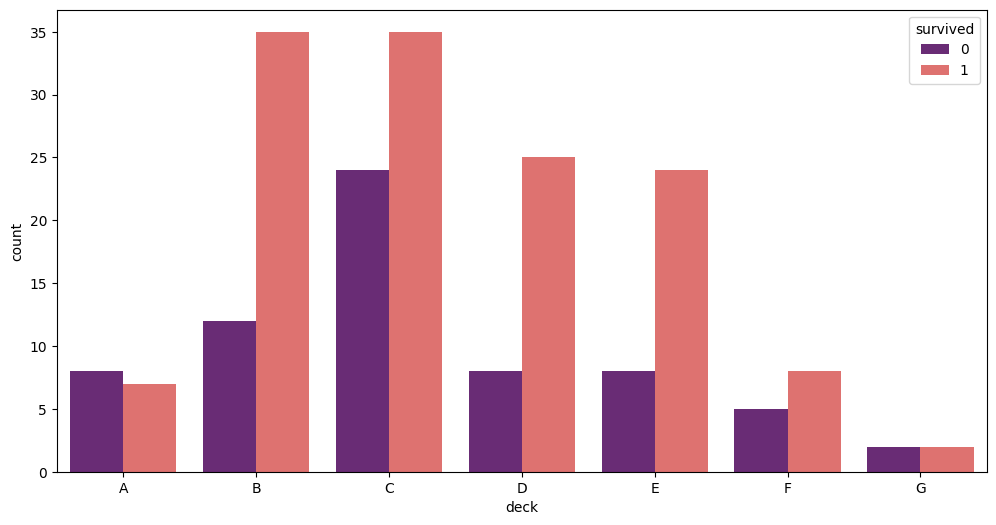

In [8]:
#now, comparing it with the "survived" variable --->

plt.figure(figsize=(12, 6))
deck_survived_fig = sns.countplot(x = df["deck"], hue = "survived", data = df, palette = "magma")
plt.show()
deck_survived_fig.figure.savefig("deck_survived.png")

In [9]:
#Conclusion: Decks A and G had very high death rates.
#Leaving the deck for modeling or filling it up with artificial data might change the data structure; it would be better to drop it off.

df.drop(["deck"], axis = 1, inplace = True)

#skim
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


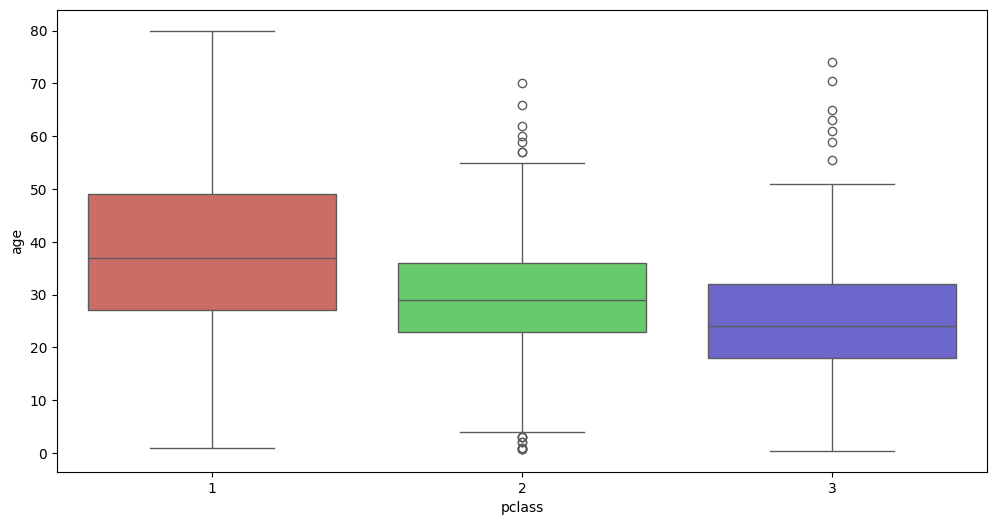

In [10]:
#Now, from the null value chart, addressing the age variable.
#The age variable is rather important and has fewer null values. And now analyzing this variable in depth.
#It might be better to fill up these null values according to their passenger class's age average, thus analyzing the pclass vs. age variable. 

plt.figure(figsize=(12, 6))
age_with_null_fig = sns.boxplot(x = "pclass", y = "age", data = df, palette = "hls")
plt.show()
age_with_null_fig.figure.savefig("age_with_null_fig.png")

In [11]:
#estimating mean of age according to their pclass
df.pivot_table(values = ["age"], index = ["pclass"], aggfunc = ["mean"])

,mean
,age
pclass,
1,38.233441
2,29.877630
3,25.140620


In [12]:
#Filling up the age variable's null values according to pclass variables condition
#This line of code works like, df.loc[(conditions, single or multiple), "value_to_be_applied_variable"] = value
#For this instance, if pclass values are 1, 2, or 3, assign according age null values, with the mean of age, of that pclass group.

df.loc[((df["pclass"] == 1) & (df["age"].isnull())), "age"] = 38.233441
df.loc[((df["pclass"] == 2) & (df["age"].isnull())), "age"] = 29.877630
df.loc[((df["pclass"] == 3) & (df["age"].isnull())), "age"] = 25.140620

In [13]:
#Checking for Null values again,
sum_null = df.isnull().sum()
pd.DataFrame(data = sum_null, columns = ["Total Null Values"])

,Total Null Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [14]:
#Now, only null values are in the embark_town variable, which is very insignificant, so it would be better dropped off.
df.dropna(inplace = True)

In [15]:
#Checking for Null values again,
sum_null = df.isnull().sum()
pd.DataFrame(data = sum_null, columns = ["Total Null Values"])

,Total Null Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


In [16]:
#data skim
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   who          889 non-null    object 
 8   adult_male   889 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 71.2+ KB


**Visual Data Analysis**

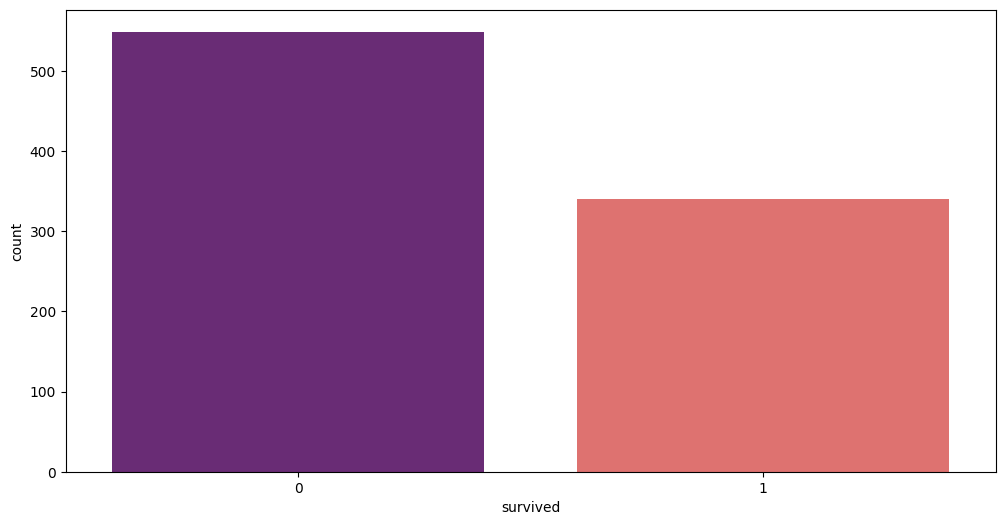

In [17]:
#now, after cleaning up data, checking the label variable, survived --->

plt.figure(figsize=(12, 6))
survived_filter_fig = sns.countplot(x = "survived", data = df, palette = "magma", )
plt.show()
survived_filter_fig.figure.savefig("survived_filter_fig.png")

#conclusion: in the sample data, more people died than survived

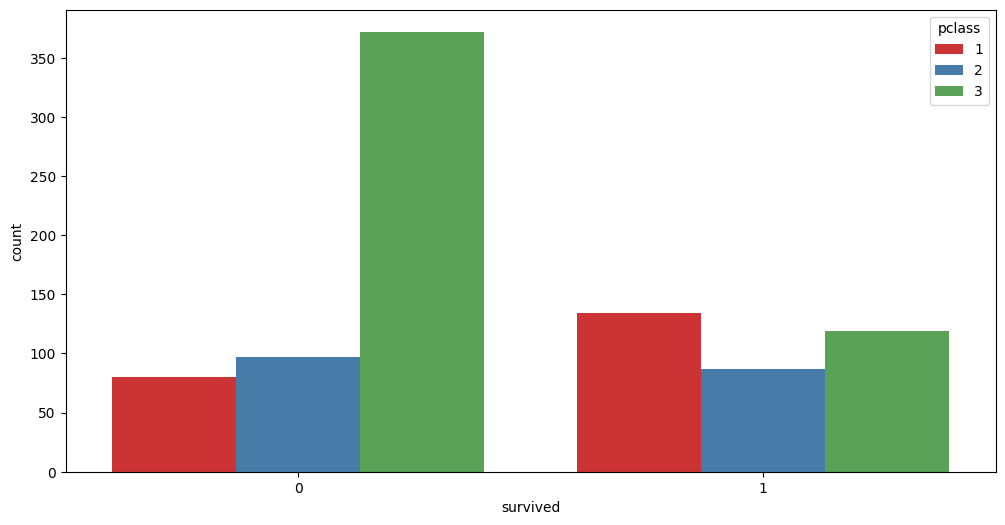

In [18]:
#Now, checking the label variable, survived with comparison to the pclass variable --->

plt.figure(figsize=(12, 6))
survived_pclass_fig = sns.countplot(x = "survived", hue = "pclass", data = df, palette = "Set1", )
plt.show()
survived_pclass_fig.figure.savefig("survived_pclass_fig.png")

#conclusion: Class 3 passengers died the most, both in number and proportionally, and 1st class passengers survived the most.

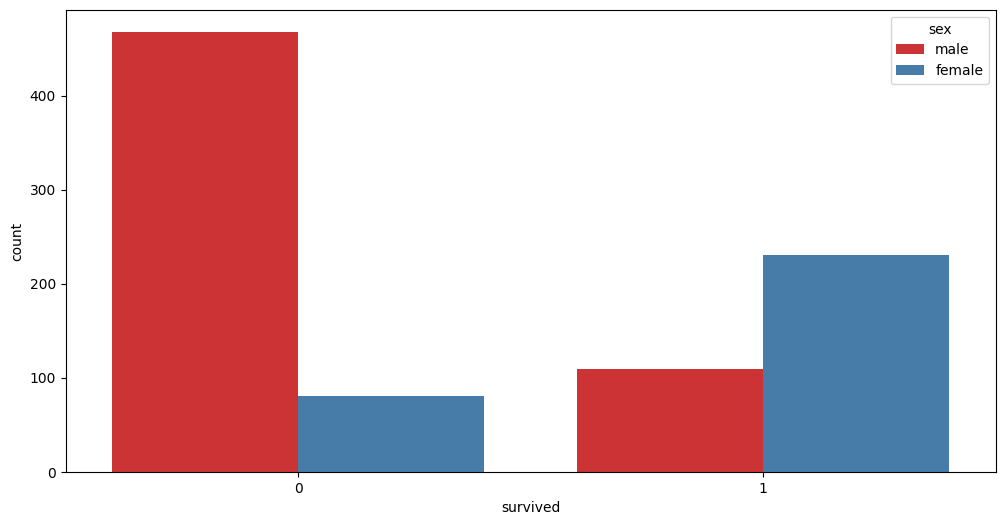

In [19]:
#Now, checking the label variable, survived with comparison to the sex variable --->

plt.figure(figsize=(12, 6))
survived_sex_fig = sns.countplot(x = "survived", hue = "sex", data = df, palette = "Set1")
plt.show()
survived_sex_fig.figure.savefig("survived_sex_fig.png")

#conclusion: death rate of male is much larger than female in the dataset.

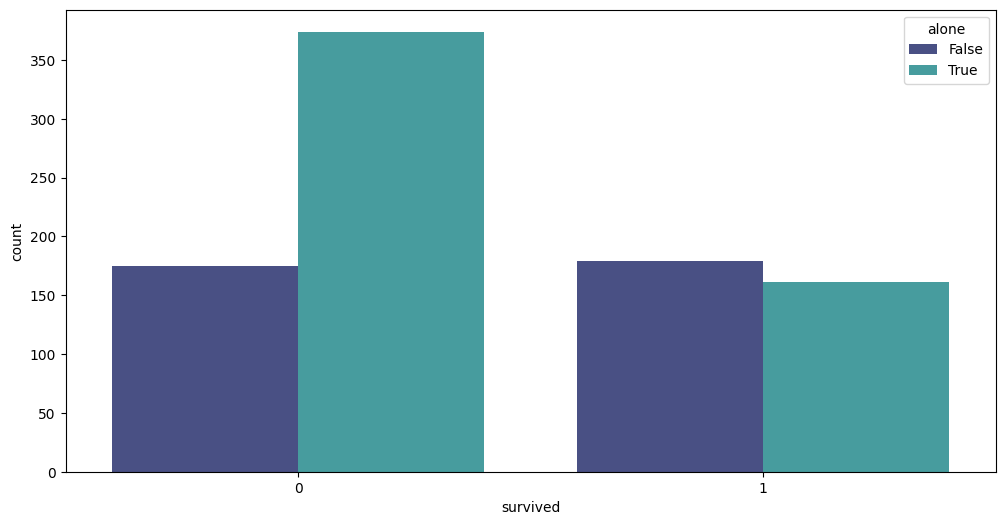

In [20]:
#Now, checking the label variable, survived with comparison to the alone variable --->

plt.figure(figsize=(12, 6))
survived_alone_fig = sns.countplot(x = "survived", hue = "alone", data = df, palette = "mako")
plt.show()
survived_alone_fig.figure.savefig("survived_alone_fig.png")

#conclusion: Those who were alone died in greater numbers than those who had any companions.

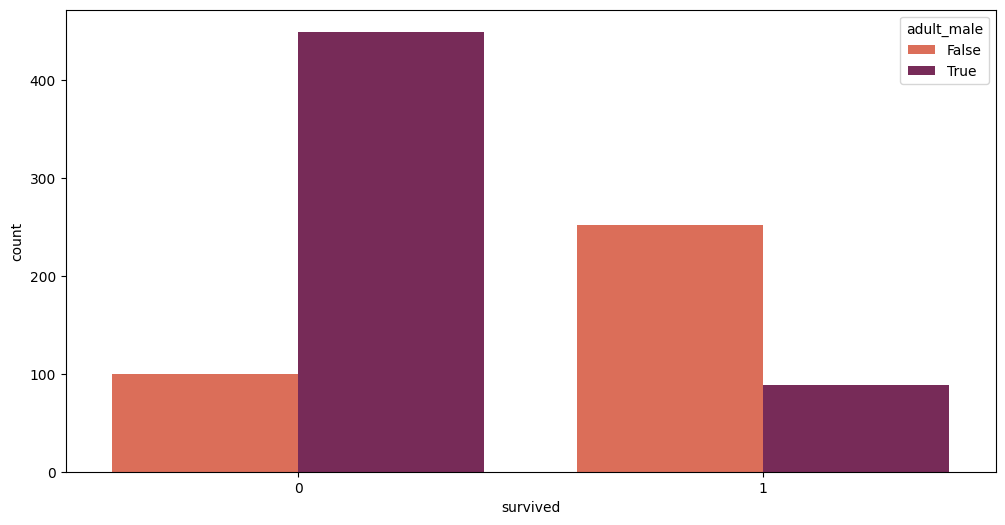

In [21]:
#Now, checking the label variable, survived with comparison to the adult male variable --->

plt.figure(figsize=(12, 6))
survived_adult_male_fig = sns.countplot(x = "survived", hue = "adult_male", data = df, palette = "rocket_r")
plt.show()
survived_adult_male_fig.figure.savefig("survived_adult_male_fig.png")

#conclusion: Greater percentage of adult males died in the incident

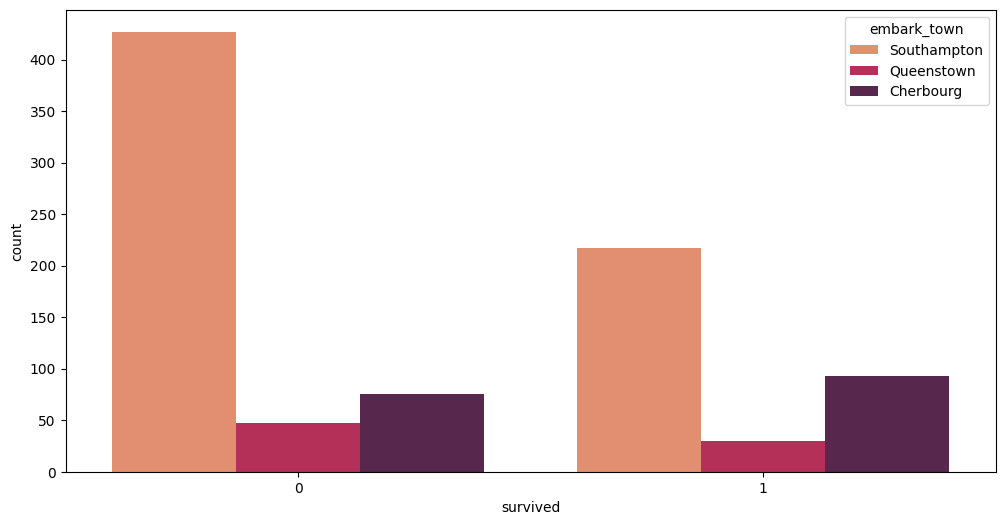

In [22]:
#Now, checking the label variable, survived with comparison to the embark town variable --->

plt.figure(figsize=(12, 6))
survived_embark_town_fig = sns.countplot(x = "survived", hue = "embark_town", data = df, palette = "rocket_r")
plt.show()
survived_embark_town_fig.figure.savefig("survived_embark_town_fig.png")

#conclusion: Most of the passengers were from Southampton, and the death rate and number of people who died were higher for the Southampton.

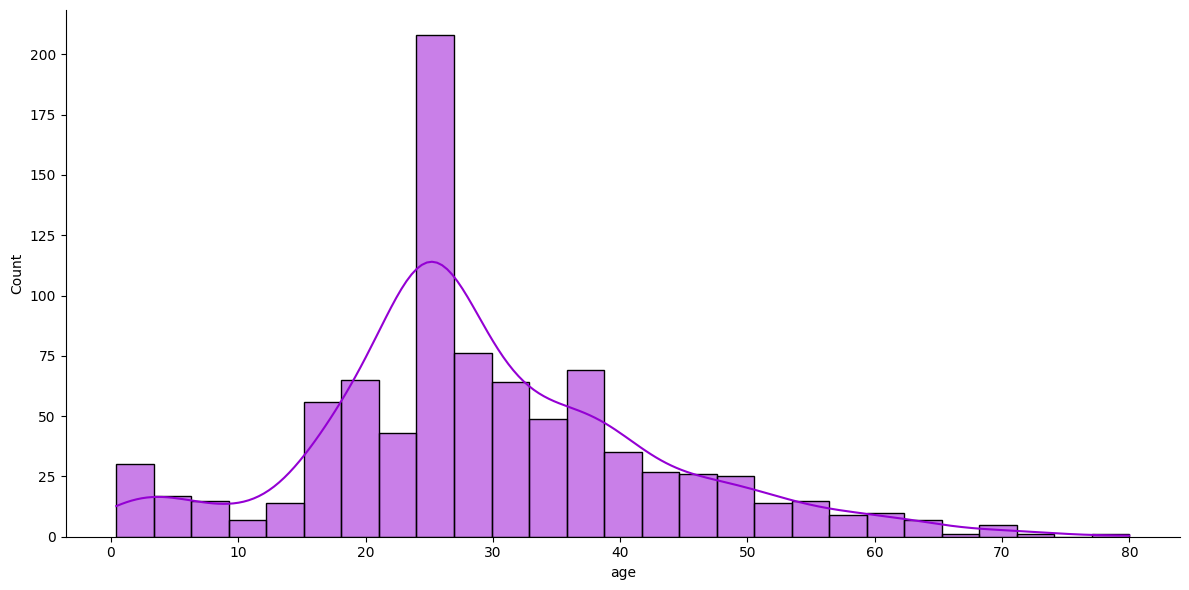

In [23]:
#Now, checking the age variable in detail --->

titanic_age_fig = sns.displot(x = "age", data = df, color = "darkviolet", kind = "hist", kde = True, height = 6, aspect = 2)
plt.show()
titanic_age_fig.figure.savefig("titanic_age_fig.png")

#conclusion: The age variable is slightly right-skewed; the majority were in their mid-20s.

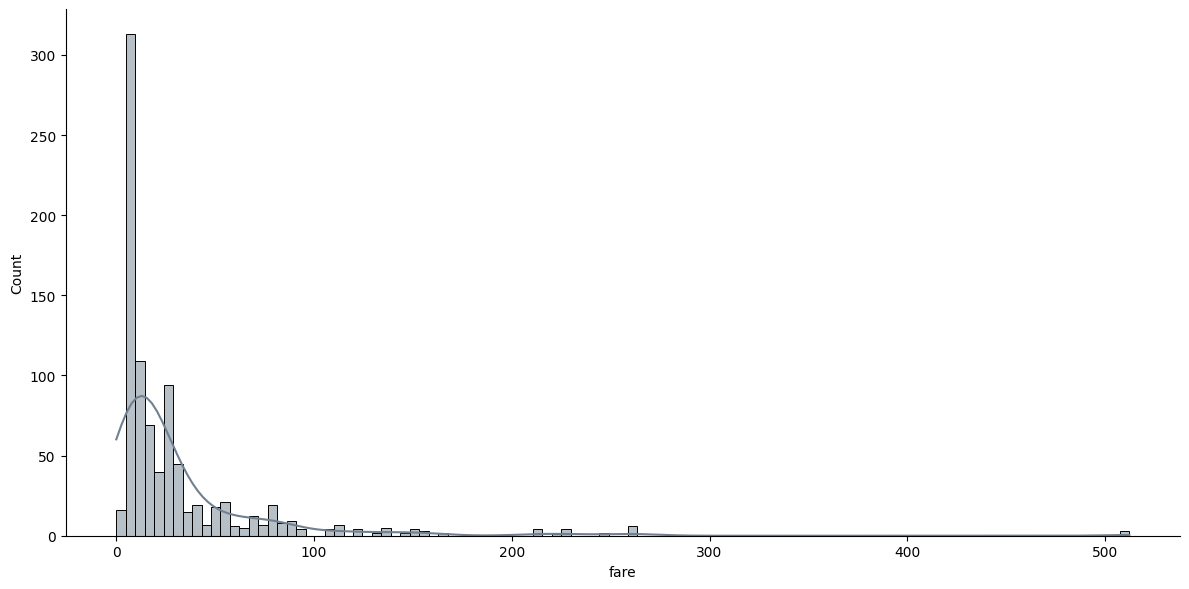

In [24]:
#Now, checking the ticket price (fare) variable in detail --->

titanic_fare_fig = sns.displot(x = "fare", data = df, color = "slategrey", kind = "hist", kde = True, height = 6, aspect = 2)
plt.show()
titanic_fare_fig.figure.savefig("titanic_fare_fig.png")

#conclusion: The fare variable is very right-skewed; sub-50 USD or Pound price ticket passengers were the majority.

**Heatmap of Correlation Matrix**
    
    The heatmap of the correlation matrix will be very useful because it will provide much detail and insight into the relationship between variables with a color scheme for making decisions and modeling data.

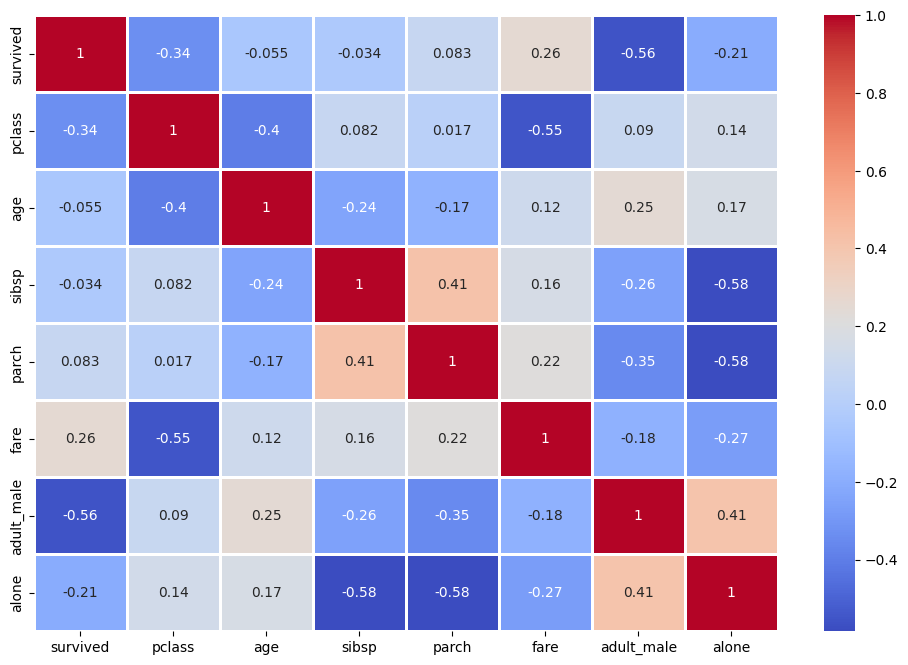

In [25]:
#developing Heatmap of Correlation Matrix with pd.corr() --->

plt.figure(figsize = (12,8))
Titanic_Corr_Hmap = sns.heatmap(data = df.corr(numeric_only = True), annot = True, cmap = "coolwarm", linewidths = 1)
plt.show()
Titanic_Corr_Hmap.figure.savefig("Titanic_Corr_Hmap.png")

#conclusion: age, sibsp, and parch variables have a very low correlation with the label variable survived. Thus, they need to be dropped.

In [26]:
#droping variable - age, sibsp, and parch

df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

#skim
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [27]:
#There are still many variables in the dataframe that are categorical and can't be used in modeling for machine learning. 
#Thus, the categorical values of the dataframe need to be converted into numerical or binary values to be able to be used in data modeling for ML.
#For this function, using pandas.get_dummies(). --->

sex = pd.get_dummies(df["sex"], prefix = "Sex", dtype = "int")
adult_male = pd.get_dummies(df["adult_male"], prefix = "Adult_Male", dtype = "int")
embark_town = pd.get_dummies(df["embark_town"], prefix = "Town", dtype = "int")
alone = pd.get_dummies(df["alone"], prefix = "Alone", dtype = "int")
who = pd.get_dummies(df["who"], prefix = "Who", prefix_sep = ":", dtype = "int")

In [28]:
#Now these variables need to be added to the main dataframe.
#using concat() for that --->

df = pd.concat([df, sex, adult_male, embark_town, alone, who], axis = 1)

#skim
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,Sex_female,Sex_male,Adult_Male_False,Adult_Male_True,Town_Cherbourg,Town_Queenstown,Town_Southampton,Alone_False,Alone_True,Who:child,Who:man,Who:woman
0,0,3,male,7.2500,man,True,Southampton,False,0,1,0,1,0,0,1,1,0,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,1,0,1,0,1,0,0,1,0,0,0,1
2,1,3,female,7.9250,woman,False,Southampton,True,1,0,1,0,0,0,1,0,1,0,0,1
3,1,1,female,53.1000,woman,False,Southampton,False,1,0,1,0,0,0,1,1,0,0,0,1
4,0,3,male,8.0500,man,True,Southampton,True,0,1,0,1,0,0,1,0,1,0,1,0


In [29]:
#now removing the categorical values from the dataframe and inplace.

df.drop(["sex", "who", "adult_male", "embark_town", "alone"], axis = 1, inplace = True)

#skim
df.head()

#conclusion: The data seems ready for modeling.

,survived,pclass,fare,Sex_female,Sex_male,Adult_Male_False,Adult_Male_True,Town_Cherbourg,Town_Queenstown,Town_Southampton,Alone_False,Alone_True,Who:child,Who:man,Who:woman
0,0,3,7.2500,0,1,0,1,0,0,1,1,0,0,1,0
1,1,1,71.2833,1,0,1,0,1,0,0,1,0,0,0,1
2,1,3,7.9250,1,0,1,0,0,0,1,0,1,0,0,1
3,1,1,53.1000,1,0,1,0,0,0,1,1,0,0,0,1
4,0,3,8.0500,0,1,0,1,0,0,1,0,1,0,1,0


**Data Modeling for Machine Learning**

In [30]:
#Importing train_test_split() from the Sk-Learn library

from sklearn.model_selection import train_test_split

In [31]:
#splitting data into feature (independent) and labels (dependent)

X = df.drop(["survived"], axis = 1)
y = df["survived"]

In [32]:
#now using train_test_split() to split data.
#setting train data - 85%, test data - 15%, random_state = 89 (Personal Bias)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 89)

In [33]:
#Importing the estimator model from the sklearn library

from sklearn.linear_model import LogisticRegression

In [34]:
#assigning estimator model to a variable for application

ML_LogisticRegression = LogisticRegression()

In [35]:
#Fitting train data into estimator to generate model

ML_LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [36]:
#Now it's time to generate predict values, based on the testing data, according to this model.

y_predict = ML_LogisticRegression.predict(X_test)

**Performance Evaluation**

In [37]:
#To evaluate the performance of the model generated, use classification report and confusion matrix
#first, need to import it from sklearn tho --->

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
#reviewing the classification report --->

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        73
           1       0.80      0.79      0.79        61

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



In [39]:
#reviewing confusion matrix data --->

confusion_matrix_data = confusion_matrix(y_test, y_predict)

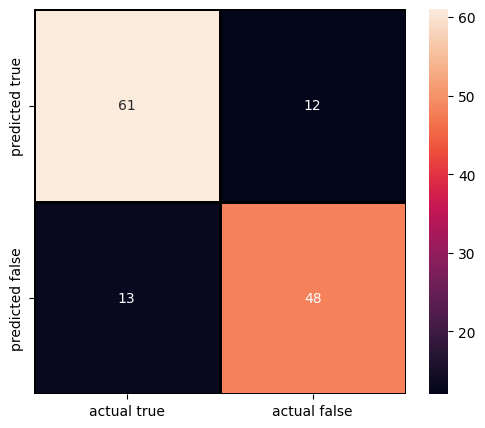

In [49]:
#Heatmap representation of confusion matrix --->

plt.figure(figsize = (6,5))
confusion_matrix_Hmap = sns.heatmap(data = confusion_matrix_data, annot = True, linewidths = 1, linecolor = "black", 
                                    xticklabels = ["actual true", "actual false"], 
                                    yticklabels = ["predicted true", "predicted false"])
plt.show()
confusion_matrix_Hmap.figure.savefig("confusion_matrix_Hmap.png")

**Project Conclusion**

    Upon evaluation, the accuracy, precision, and recall metrics have performed well in the classification report. However, the confusion matrix analysis reveals a somewhat higher count of false negatives compared to false positives, which is slightly less than ideal for this dataset. While the results are acceptable, there is room for improvement. I may revisit this project in the future to enhance these metrics with more knowledge and insight.